In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

warnings.filterwarnings('ignore')

In [18]:
prime = pd.read_csv('prime.csv')
len(prime)

662

In [19]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
len(film)

662

In [20]:
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
len(screen)

39749

In [22]:
timetable = pd.read_csv('../01.Data_Collection/show_timetable.csv')
len(timetable)

13135726

In [17]:
timetable.sample()

,가격,상영관,상영시각,상영일자,영화명,좌석수,영화관,상영분류
2092624,"11,000원",06관,22:30,2017-08-12,청년경찰,125.000000,CGV 역곡,디지털


In [23]:
prime = prime.merge(film, how='left', on='영화명')
prime.sample()

,영화명,총공급좌석수,영화코드,개봉일,F-rated,장르,등급,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배우코드,배우성별,배우_대표역할,배우필모
158,대관람차,38820.000000,20182065,2018-08-30,0,드라마,12세이상관람가,독립/예술영화,우주레이블,무브먼트,626,36,29812250.000000,3591,22999950,2616,시민 노무현|대관람차|꿈의 제인|마차 타고 고래고래|마이 페어 웨딩|그들이 죽었다|...,백재호,20177441.000000,남자,이희섭,20153480.0,남자,-,-,-,-,-,-,백재호,백재호,백재호,20177441,남자,감독,시민 노무현|대관람차|꿈의 제인|마차 타고 고래고래|마이 페어 웨딩|그들이 죽었다|...,"강두,호리 하루나,지대한",강두,20302569,남자,배우,대관람차|성혜의 나라|형|마이 리틀 히어로|작업의 정석


In [24]:
daily = prime.merge(screen, how='left', on='영화코드').drop(['개봉일_x', '영화명_y'], axis=1).rename(columns={'F-rated':'F등급', '영화명_x':'영화명', '상영횟수_x':'전체상영횟수', '개봉일_y':'개봉일', '상영횟수_y':'일일상영횟수'})
daily.shape

(39749, 59)

In [25]:
daily.corr()

,총공급좌석수,영화코드,F등급,전체상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드,개봉n일차(int),일일상영횟수,상영점유율,상영점유율순위,스크린수,스크린점유율,스크린점유율순위,좌석수,좌석판매율,좌석점유율,좌석점유율순위,매출액,누적매출액,관객수,누적관객수
총공급좌석수,1.000000,-0.026303,-0.231480,0.995446,0.871281,0.951627,0.947459,0.949808,0.945612,-0.206887,-0.108484,-0.222310,0.009252,0.439460,0.405984,-0.230572,0.449753,0.419291,-0.246464,0.433575,0.147387,0.430352,-0.232173,0.370905,0.864057,0.375899,0.860199
영화코드,-0.026303,1.000000,0.052124,-0.035590,0.030214,-0.051078,-0.061124,-0.061835,-0.070512,0.177714,0.103022,0.130260,-0.103820,-0.020132,-0.041163,0.084065,-0.005804,-0.042471,0.090839,-0.028227,0.023751,-0.042175,0.086299,-0.021565,-0.043989,-0.026536,-0.053052
F등급,-0.231480,0.052124,1.000000,-0.234580,-0.256398,-0.216369,-0.216102,-0.210301,-0.209773,0.116006,0.095689,0.158474,0.015987,-0.126551,-0.126521,0.101223,-0.137389,-0.138860,0.102534,-0.122528,-0.027929,-0.123204,0.106297,-0.099082,-0.195308,-0.101095,-0.194858
전체상영횟수,0.995446,-0.035590,-0.234580,1.000000,0.891451,0.957378,0.955244,0.956225,0.953765,-0.219361,-0.119578,-0.229424,0.014668,0.440491,0.411048,-0.237395,0.454391,0.427893,-0.253406,0.432855,0.155625,0.430694,-0.237006,0.372255,0.870113,0.378013,0.868129
전국스크린수,0.871281,0.030214,-0.256398,0.891451,1.000000,0.806744,0.805273,0.801289,0.799033,-0.245606,-0.139662,-0.263313,-0.006810,0.434429,0.414766,-0.279892,0.474299,0.447423,-0.296681,0.417772,0.198381,0.414014,-0.269306,0.337170,0.735510,0.342680,0.734241
전국매출액,0.951627,-0.051078,-0.216369,0.957378,0.806744,1.000000,0.999208,0.996274,0.995191,-0.202005,-0.111427,-0.204108,0.034070,0.386529,0.344035,-0.180730,0.393145,0.360408,-0.194363,0.384407,0.123367,0.381235,-0.182971,0.365955,0.919263,0.372046,0.918503
전국관객수,0.947459,-0.061124,-0.216102,0.955244,0.805273,0.999208,1.000000,0.996034,0.996354,-0.206994,-0.114245,-0.204792,0.035907,0.385053,0.343766,-0.181510,0.391739,0.360532,-0.195074,0.383351,0.124223,0.380900,-0.183756,0.365140,0.918251,0.371820,0.918957
서울매출액,0.949808,-0.061835,-0.210301,0.956225,0.801289,0.996274,0.996034,1.000000,0.999356,-0.207007,-0.118087,-0.203697,0.038000,0.384095,0.345981,-0.182457,0.390387,0.362238,-0.196025,0.382481,0.121670,0.380845,-0.185045,0.362956,0.916228,0.369165,0.915966
서울관객수,0.945612,-0.070512,-0.209773,0.953765,0.799033,0.995191,0.996354,0.999356,1.000000,-0.211036,-0.120208,-0.204172,0.039674,0.382274,0.345079,-0.182749,0.388630,0.361713,-0.196248,0.381029,0.122456,0.379996,-0.185367,0.361869,0.915026,0.368596,0.916063
감독1코드,-0.206887,0.177714,0.116006,-0.219361,-0.245606,-0.202005,-0.206994,-0.207007,-0.211036,1.000000,0.671973,0.203274,-0.004439,-0.112342,-0.128288,0.109589,-0.120126,-0.139070,0.116149,-0.109620,-0.043446,-0.113807,0.121047,-0.086503,-0.187027,-0.090034,-0.191527


In [26]:
prime.corr()

,총공급좌석수,영화코드,F-rated,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독1코드,작가코드,배우코드
총공급좌석수,1.000000,-0.008817,-0.169352,0.995257,0.856550,0.946012,0.942522,0.944463,0.940860,-0.160875,-0.088084,-0.164225
영화코드,-0.008817,1.000000,0.029395,-0.016023,0.051826,-0.028246,-0.036512,-0.037876,-0.045068,0.168475,0.081471,0.130145
F-rated,-0.169352,0.029395,1.000000,-0.171868,-0.188546,-0.164197,-0.164433,-0.158251,-0.158313,0.073293,0.078667,0.131371
상영횟수,0.995257,-0.016023,-0.171868,1.000000,0.877986,0.950390,0.948658,0.949045,0.946966,-0.170416,-0.094813,-0.170770
전국스크린수,0.856550,0.051826,-0.188546,0.877986,1.000000,0.773698,0.772849,0.768457,0.766963,-0.187967,-0.106690,-0.203346
전국매출액,0.946012,-0.028246,-0.164197,0.950390,0.773698,1.000000,0.999249,0.996102,0.995132,-0.153782,-0.088645,-0.148114
전국관객수,0.942522,-0.036512,-0.164433,0.948658,0.772849,0.999249,1.000000,0.995788,0.996159,-0.157401,-0.090497,-0.148671
서울매출액,0.944463,-0.037876,-0.158251,0.949045,0.768457,0.996102,0.995788,1.000000,0.999378,-0.158370,-0.093732,-0.147422
서울관객수,0.940860,-0.045068,-0.158313,0.946966,0.766963,0.995132,0.996159,0.999378,1.000000,-0.161256,-0.095055,-0.147990
감독1코드,-0.160875,0.168475,0.073293,-0.170416,-0.187967,-0.153782,-0.157401,-0.158370,-0.161256,1.000000,0.688125,0.171936


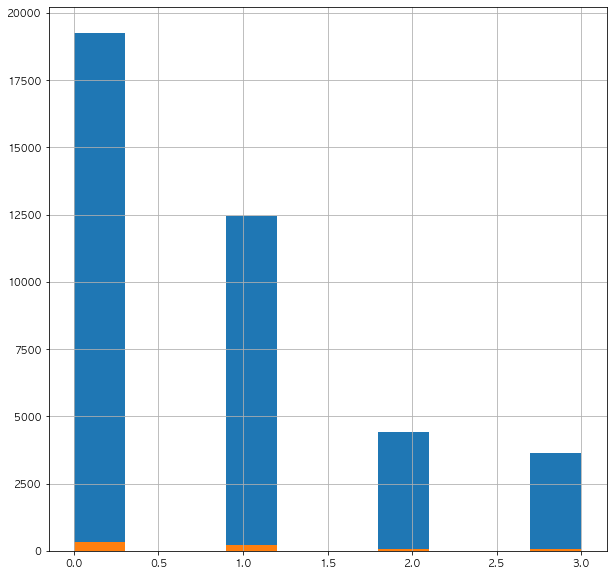

In [36]:
plt.figure(figsize=[10,10])
daily['F등급'].hist()
prime['F-rated'].hist()
# 파란색: 총 상영일수
# 주황색: 영화개수